In [1]:
import PGFPlotsX: TikzPicture, Axis, Plot, Plot3, @pgf,
                  Table, Expression, Coordinates
using LaTeXStrings

In [2]:
c = [(-2,0), (-1,1), (0,0), (1,1), (2,0)];

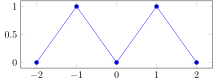

In [3]:
@pgf a = Axis(Plot(Coordinates(c)),
    {y => "2 cm"}
)

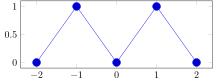

In [4]:
# TODO: This is not so nice...
tp = TikzPicture(["\\tikzset{every mark/.append style={scale=2}}",
                  a])

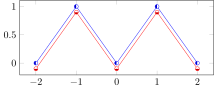

In [5]:
c2 = map(x -> (x[1], x[2] - 0.1), c)
@pgf Axis([Plot(Coordinates(c), {
            mark = "halfcircle*",
            "every mark/.append style" =>  { rotate = 90,}
             }),
           Plot(Coordinates(c2), {
            mark => "halfcircle*",
            "every mark/.append style" => { rotate = 180,}
             })
           ], {
    y = "2cm"
    })

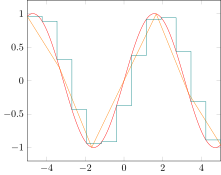

In [6]:
@pgf Axis([Plot(Expression("sin(deg(x))"), {
            red, samples = 500 }; incremental = false),
      Plot(Expression("sin(deg(x))"), {
            orange, samples = 7}; incremental = false),
      Plot(Expression("sin(deg(x))"), {
            teal, const_plot, samples = 14}; incremental = false)], {
    enlarge_x_limits = false }
)

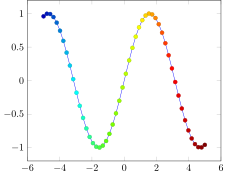

In [7]:
@pgf Axis(Plot(Expression("sin(deg(x))"), {
        scatter,
        scatter_src = "x",
        samples = 50
    }),
    "colormap/bluered")

In [8]:
@pgf function list_cycles(cycle_name)
    axis = Axis(
        {
            stack_plots => "y",
            stack_dir => "minus",
            cycle_list_name => cycle_name
        }
    )
    c = Coordinates([(0,1), (0.5,1), (1,1)])
    for i in 1:13
        push!(axis, Plot(c))
    end

    axis
end

list_cycles (generic function with 1 method)

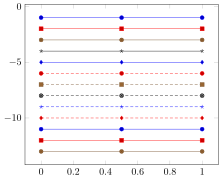

In [9]:
list_cycles("color")

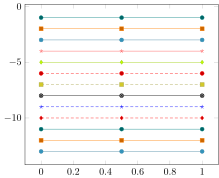

In [10]:
list_cycles("exotic")

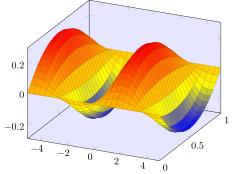

In [11]:
@pgf Axis(Plot3(Expression("sin(deg(x)) * y*(1-y)"), { 
            surf,
            y_domain = 0:1,
        }; incremental = false),
    "axis background/.style" => { fill = "blue!10", })

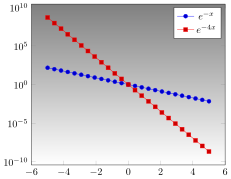

In [12]:
@pgf Axis([Plot(Expression("exp(-x)"),   label = L"e^{-x}"), 
      Plot(Expression("exp(-4*x)"), label = L"e^{-4x}")],
    {
        "axis background/.style" => {
            shade,
            top_color = "gray",
            bottom_color = "white",
            },
        ymode => "log"
    }
)